In [1]:
%matplotlib inline

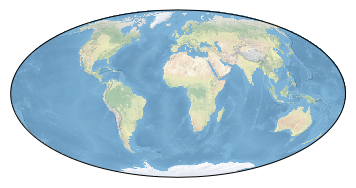

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

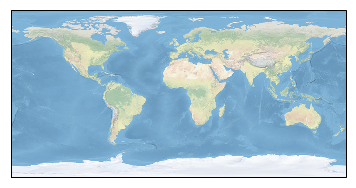

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.show()

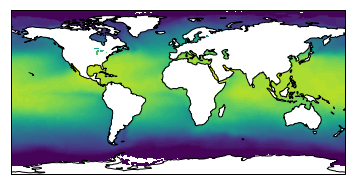

In [4]:
from netCDF4 import Dataset as netcdf_dataset
dataset = netcdf_dataset('./HadISST1_SST_update.nc')
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

In [8]:
def tube_locations():
    """
    Returns an (n, 2) array of selected London Tube locations in Ordnance
    Survey GB coordinates.

    Source: http://www.doogal.co.uk/london_stations.php

    """
    return np.array([[531738., 180890.], [532379., 179734.],
                     [531096., 181642.], [530234., 180492.],
                     [531688., 181150.], [530242., 180982.],
                     [531940., 179144.], [530406., 180380.],
                     [529012., 180283.], [530553., 181488.],
                     [531165., 179489.], [529987., 180812.],
                     [532347., 180962.], [529102., 181227.],
                     [529612., 180625.], [531566., 180025.],
                     [529629., 179503.], [532105., 181261.],
                     [530995., 180810.], [529774., 181354.],
                     [528941., 179131.], [531050., 179933.],
                     [530240., 179718.]])


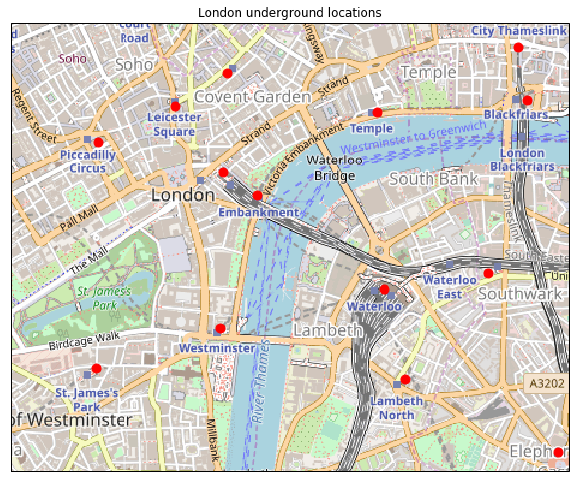

In [9]:
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM

imagery = OSM()

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)
ax.set_extent([-0.14, -0.1, 51.495, 51.515], ccrs.PlateCarree())

# Add the imagery to the map.
ax.add_image(imagery, 14)

# Plot the locations twice, first with the red concentric circles,
# then with the blue rectangle.
xs, ys = tube_locations().T
ax.plot(xs, ys, transform=ccrs.OSGB(),
        marker='o', color='red', markersize=9, linestyle='')

ax.set_title('London underground locations')
fig.set_size_inches([10, 10])